In [2]:
## Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score
import statsmodels.api as sn 

C:\Users\kater\AppData\Local\Temp\ipykernel_11240\4158429468.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
## getting data

flight_data = pd.read_csv('Flight_takeoff.csv')
flight_data

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,...,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,...,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,...,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,...,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,...,32,58,W,24,35,29.91,Fair / Windy,9,17,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28815,1,31,5,B6,N216JB,ORH,2,57,150,1370,...,38,96,N,6,0,30.18,Cloudy,20,32,19
28816,1,31,5,AA,N104NN,BOS,2,75,187,1390,...,38,96,N,6,0,30.18,Cloudy,19,23,22
28817,1,31,5,AS,N581AS,SEA,283,392,2422,1125,...,38,96,N,6,0,30.18,Cloudy,19,23,21
28818,1,31,5,B6,N957JB,SJU,5,224,1598,1417,...,38,96,N,6,0,30.18,Cloudy,19,23,13


In [4]:
## data types
flight_data.dtypes

MONTH                  int64
DAY_OF_MONTH           int64
DAY_OF_WEEK            int64
OP_UNIQUE_CARRIER     object
TAIL_NUM              object
DEST                  object
DEP_DELAY              int64
CRS_ELAPSED_TIME       int64
DISTANCE               int64
CRS_DEP_M              int64
DEP_TIME_M             int64
CRS_ARR_M              int64
Temperature            int64
Dew Point             object
Humidity               int64
Wind                  object
Wind Speed             int64
Wind Gust              int64
Pressure             float64
Condition             object
sch_dep                int64
sch_arr                int64
TAXI_OUT               int64
dtype: object

In [5]:
## Check for null values
flight_data.isnull().sum()

MONTH                0
DAY_OF_MONTH         0
DAY_OF_WEEK          0
OP_UNIQUE_CARRIER    0
TAIL_NUM             0
DEST                 0
DEP_DELAY            0
CRS_ELAPSED_TIME     0
DISTANCE             0
CRS_DEP_M            0
DEP_TIME_M           0
CRS_ARR_M            0
Temperature          0
Dew Point            0
Humidity             0
Wind                 2
Wind Speed           0
Wind Gust            0
Pressure             0
Condition            0
sch_dep              0
sch_arr              0
TAXI_OUT             0
dtype: int64

In [6]:
##Checking for values in Wind Column
unique_wind = flight_data['Wind'].unique()
print(unique_wind)

['W' 'WNW' 'NW' 'NNW' 'S' 'ENE' 'NE' 'NNE' 'E' 'SE' 'CALM' 'SW' 'VAR'
 'SSE' 'SSW' 'WSW' 'N' 'ESE' nan]


In [7]:
# Identify rows with missing values in the "WIND" column
missing_rows = flight_data[flight_data['Wind'].isnull()]
missing_rows

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
15156,12,19,4,B6,N648JB,FLL,60,189,1069,1275,...,10,55,NaN,0,0,30.42,Mostly Cloudy,21,33,41
15157,12,19,4,9E,N136EV,PWM,3,83,273,1349,...,10,55,NaN,0,0,30.42,Mostly Cloudy,21,33,40


In [8]:
# Change specific rows with NaN values in 'Wind' column to 'W'
specific_rows = [15156, 15157]
for row_index in specific_rows:
    if pd.isnull(flight_data.at[row_index, 'Wind']):
        flight_data.at[row_index, 'Wind'] = 'W'

In [9]:
flight_data.isnull().sum()

MONTH                0
DAY_OF_MONTH         0
DAY_OF_WEEK          0
OP_UNIQUE_CARRIER    0
TAIL_NUM             0
DEST                 0
DEP_DELAY            0
CRS_ELAPSED_TIME     0
DISTANCE             0
CRS_DEP_M            0
DEP_TIME_M           0
CRS_ARR_M            0
Temperature          0
Dew Point            0
Humidity             0
Wind                 0
Wind Speed           0
Wind Gust            0
Pressure             0
Condition            0
sch_dep              0
sch_arr              0
TAXI_OUT             0
dtype: int64

In [10]:
# Save the modified dataset
flight_data.to_csv("modified_dataset.csv", index=False)

In [11]:
flight_data.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,...,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,...,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,...,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,...,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,...,32,58,W,24,35,29.91,Fair / Windy,9,17,13


In [12]:
flight_data.dtypes

MONTH                  int64
DAY_OF_MONTH           int64
DAY_OF_WEEK            int64
OP_UNIQUE_CARRIER     object
TAIL_NUM              object
DEST                  object
DEP_DELAY              int64
CRS_ELAPSED_TIME       int64
DISTANCE               int64
CRS_DEP_M              int64
DEP_TIME_M             int64
CRS_ARR_M              int64
Temperature            int64
Dew Point             object
Humidity               int64
Wind                  object
Wind Speed             int64
Wind Gust              int64
Pressure             float64
Condition             object
sch_dep                int64
sch_arr                int64
TAXI_OUT               int64
dtype: object

In [13]:
flight_data.shape

(28820, 23)

In [14]:
X = flight_data.iloc[:, 16].values.reshape(-1,1) ## Wind Speed -INDEPENDENT FEATURE as TWO dimensional

y = flight_data.iloc[:, 22] ## TAXI OUT DEPENDENT FEATURE

In [15]:
X

array([[25],
       [25],
       [25],
       ...,
       [ 6],
       [ 6],
       [ 6]], dtype=int64)

In [16]:
y

0        14
1        15
2        22
3        12
4        13
         ..
28815    19
28816    22
28817    21
28818    13
28819    15
Name: TAXI_OUT, Length: 28820, dtype: int64

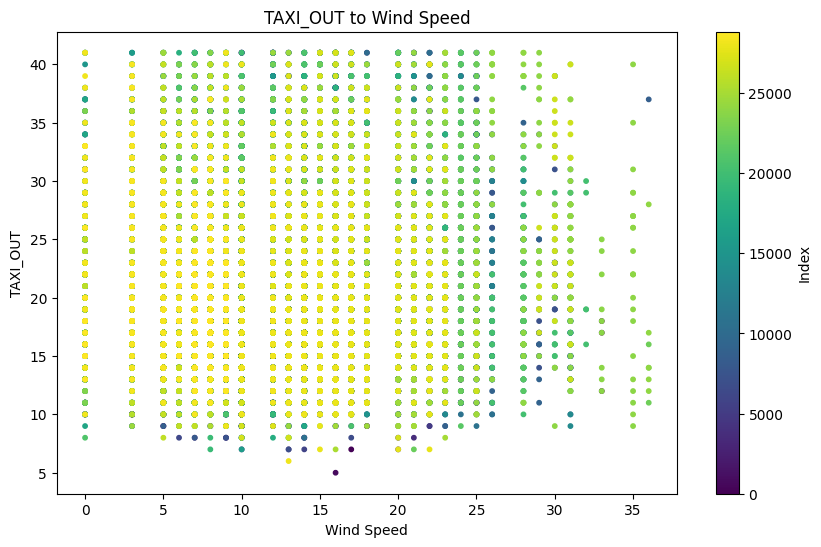

In [17]:

wind_speed =flight_data['Wind Speed']
taxi_out = flight_data['TAXI_OUT']

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(wind_speed, taxi_out, c=range(len(wind_speed)), cmap='viridis', marker='o', s=10)  # s is the size of markers
plt.xlabel('Wind Speed')
plt.ylabel('TAXI_OUT')
plt.title('TAXI_OUT to Wind Speed')
plt.colorbar(label='Index')  # Add color bar
plt.show()


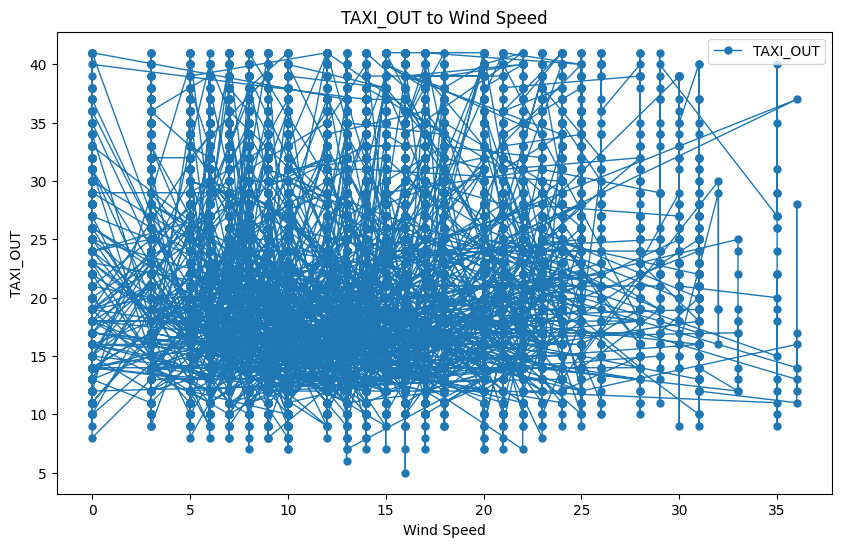

In [18]:
wind_speed =flight_data['Wind Speed']
taxi_out = flight_data['TAXI_OUT']

# Prepare data
wind_speed = flight_data['Wind Speed'].values
taxi_out = flight_data['TAXI_OUT'].values

# Create a new figure with a specific size
plt.figure(figsize=(10, 6))

# Create a line plot
plt.plot(wind_speed, taxi_out, marker='o', linewidth=1, markersize=5, label='TAXI_OUT')

# Set labels for x-axis, y-axis, and add a title
plt.xlabel('Wind Speed')
plt.ylabel('TAXI_OUT')
plt.title('TAXI_OUT to Wind Speed')

# Add a legend
plt.legend()

# Display the plot
plt.show()

In [19]:
## Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [20]:
## Standardisation

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train

array([[ 0.73672825],
       [-0.06258415],
       [ 0.57686577],
       ...,
       [ 0.25714081],
       [-1.50134646],
       [-1.02175902]])

In [21]:
## Linear Regression- Train the linear regression model on the training set
regression = LinearRegression()
regression.fit(X_train,y_train)
print ('Coefficient or slope', regression.coef_)
print('Intercept', regression.intercept_)


Coefficient or slope [0.38695561]
Intercept 20.880730973860747


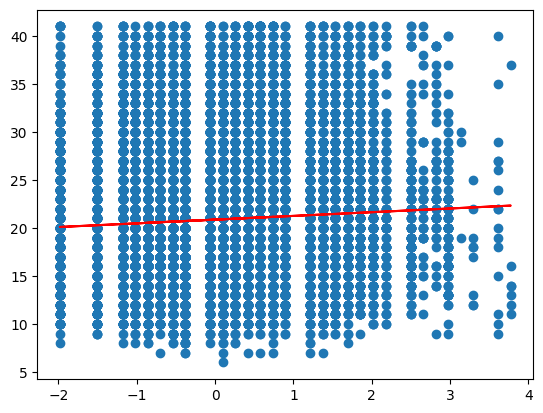

In [22]:
## Plot Training data BEST FIT LINE
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train), color = 'red')

In [23]:
## Linear regression ##
LR = LinearRegression()
LR.fit(X,y)

LinearRegression()

In [24]:
## Make predictions on test data- LINEAR REGRESSION##
y_pred = regression.predict(X_test)
y_pred

array([20.85651369, 20.85651369, 20.73279432, ..., 20.11419748,
       20.11419748, 20.67093464])

In [25]:
X_test

array([[-0.06258415],
       [-0.06258415],
       [-0.3823091 ],
       ...,
       [-1.98093389],
       [-1.98093389],
       [-0.54217158]])

In [26]:
##Abayomi
y_pred = LR.predict(X)
y_pred

array([21.72315528, 21.72315528, 21.72315528, ..., 20.42275736,
       20.42275736, 20.42275736])

In [27]:
##define model################################################################################################

model_lasso = Lasso(alpha=0.01)
model_ridge = Ridge(alpha = 0.01)

In [28]:
##fit model ##############################################################################################################
model_lasso.fit(X, y)
model_ridge.fit(X, y)

Ridge(alpha=0.01)

In [29]:
## prediction on model lasso and ridge ##############################################################################
pred_lasso = model_lasso.predict(X)
pred_lasso

array([21.71993088, 21.71993088, 21.71993088, ..., 20.42438269,
       20.42438269, 20.42438269])

In [30]:
## make prediction in data frame ###############################################################################################
lasso_df = pd.DataFrame({'Actual_score':y,'Predicted_score': pred_lasso})
lasso_df

,Actual_score,Predicted_score
0,14,21.719931
1,15,21.719931
2,22,21.719931
3,12,21.719931
4,13,21.651744
...,...,...
28815,19,20.424383
28816,22,20.424383
28817,21,20.424383
28818,13,20.424383


In [31]:
##Prediction on  model ridge ####################################################################################

pred_ridge = model_ridge.predict(X)
pred_ridge

array([21.72315527, 21.72315527, 21.72315527, ..., 20.42275737,
       20.42275737, 20.42275737])

In [32]:
## Make prediction in a dataframe ###################################################################
ridge_df = pd.DataFrame({'Actual_score':y,'Predicted_score': pred_ridge})
ridge_df

,Actual_score,Predicted_score
0,14,21.723155
1,15,21.723155
2,22,21.723155
3,12,21.723155
4,13,21.654713
...,...,...
28815,19,20.422757
28816,22,20.422757
28817,21,20.422757
28818,13,20.422757


In [33]:
## get results in dataframe 
## Visualize the results 

n = min(len(y_test), len(y_pred))
y_test = y_test[:n]
y_pred = y_pred[:n]
result_dict = {'Actual value': y_test.tolist(), 'Predicted value': y_pred.tolist()}
result_df = pd.DataFrame(result_dict)
result_df

,Actual value,Predicted value
0,32,21.723155
1,15,21.723155
2,20,21.723155
3,13,21.723155
4,25,21.654713
...,...,...
7200,31,21.654713
7201,14,21.654713
7202,23,21.654713
7203,13,21.654713


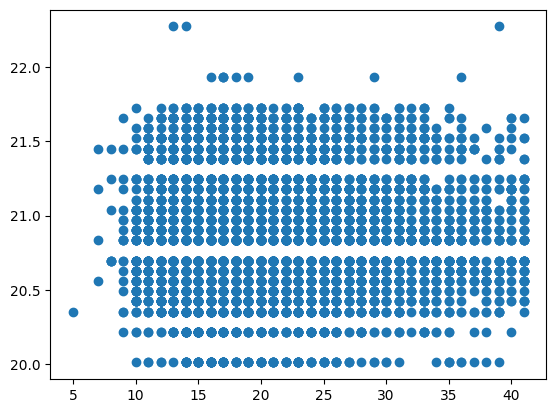

In [34]:
plt.scatter(y_test,y_pred)

In [35]:
y_test

21527    32
21965    15
10037    20
7827     13
18190    25
         ..
5706     31
25696    14
14302    23
28799    13
9328     13
Name: TAXI_OUT, Length: 7205, dtype: int64

In [36]:
y_pred

array([21.72315528, 21.72315528, 21.72315528, ..., 21.65471328,
       21.65471328, 21.65471328])

In [37]:
## Errors
residuals = y_test-y_pred
print(residuals)

21527    10.276845
21965    -6.723155
10037    -1.723155
7827     -8.723155
18190     3.345287
           ...    
5706      9.345287
25696    -7.654713
14302     1.345287
28799    -8.654713
9328     -8.654713
Name: TAXI_OUT, Length: 7205, dtype: float64


Text(0.5, 1.0, 'Distribution of Residuals')

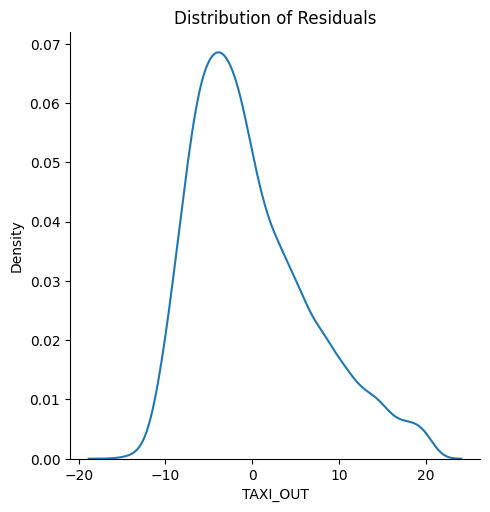

In [38]:
## visualise residuals
sns.displot(residuals, kind = 'kde')
plt.title('Distribution of Residuals')


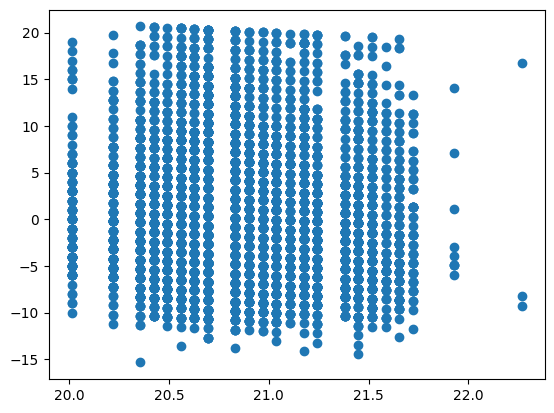

In [39]:
## Create scatteplot with respect to prediction and residuals
plt.scatter(y_pred, residuals)


In [40]:
## get results in dataframe
###result = ({'Actual value': y_test, 'Predicted value': y_pred})
###result_df = pd.DataFrame(result)
####result_df

In [41]:
## Prediction for test data-REGRESSION

y_pred = regression.predict(X_test)
y_pred

# Calculate performance metrics

mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Square Error:', rmse)

Mean Absolute Error: 5.496125538422696
Mean Squared Error: 46.760825967684525
Root Mean Square Error: 6.83818879292496


In [42]:
## Rsquare 
r2 = r2_score(y_test,y_pred)
print(r2)

0.0057510323092240245


In [43]:
## Adjusted R2

# Calculate adjusted R-squared score
n = len(y_test)
k = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

print('Adjusted R-squared Score:', adjusted_r2)

Adjusted R-squared Score: 0.005612999688414555


In [44]:
## OLS
import statsmodels.api as sn 

In [45]:
model = sn.OLS(y_train,X_train).fit() 
prediction = model.predict(X_test)
print(prediction)
print(model.summary())

[-0.02421729 -0.02421729 -0.14793665 ... -0.76653349 -0.76653349
 -0.20979634]
                                 OLS Regression Results                                
Dep. Variable:               TAXI_OUT   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):              0.000
Method:                 Least Squares   F-statistic:                              6.704
Date:                Sat, 10 Feb 2024   Prob (F-statistic):                     0.00963
Time:                        19:49:57   Log-Likelihood:                         -97456.
No. Observations:               21615   AIC:                                  1.949e+05
Df Residuals:                   21614   BIC:                                  1.949e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err         